In [1]:
import os
print(os.getcwd())


/content


In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix_dataset.csv to netflix_dataset.csv


In [3]:
import pandas as pd
df = pd.read_csv('netflix_dataset.csv')
df

,title,rating,ratinglevel,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0,80
...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN,82
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN,82


In [ ]:
df.isnull().sum()  # Total missing values per column


,0
title,0
rating,0
ratinglevel,59
release_year,0
user_rating_score,395
user_rating_size,0


In [ ]:
#Clean the Netflix dataset (missing type, date).


df.info()  # Overview of nulls and data types
print("")
df.isnull().sum()  # Total missing values per column


print(df.columns.tolist()) #actual column names in your CSV:
print("")

# 1. See which columns have missing values
print("first func")
print("")
print(df.isnull().sum())

print("")
# 2. Drop rows with missing critical values (like title or rating score)
print("second func")
print("")
df.dropna(subset=['title', 'user_rating_score'], inplace=True)

# 3. Fill less critical missing values (e.g., user_rating_size)
print("third func")
print("")
df['user_rating_size'] = df['user_rating_size'].fillna('Unknown')

# 4. Normalize text columns
print("fourth func")
print("")
df['rating'] = df['rating'].str.strip().str.upper()
df['ratinglevel'] = df['ratinglevel'].str.strip().str.title()


<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              605 non-null    object 
 1   rating             605 non-null    object 
 2   ratinglevel        574 non-null    object 
 3   release_year       605 non-null    int64  
 4   user_rating_score  605 non-null    float64
 5   user_rating_size   605 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 33.1+ KB

['title', 'rating', 'ratinglevel', 'release_year', 'user_rating_score', 'user_rating_size']

first func

title                 0
rating                0
ratinglevel          31
release_year          0
user_rating_score     0
user_rating_size      0
dtype: int64

second func

third func

fourth func



In [4]:
df.head(5) #rows having NaN values in user_rating_score have been removed

,title,rating,ratinglevel,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0,80


In [6]:
#Group data by release year, and title
df.groupby(['release_year', 'title']).size()

release_year  title                           
1940          Fantasia                            3
1976          The Smurfs and the Magic Flute      4
1978          Grease                              2
1982          Annie                               3
              The Last Unicorn                    3
                                                 ..
2017          The Mr. Peabody and Sherman Show    1
              The Vampire Diaries                 6
              Tramps                              1
              Voltron: Legendary Defender         1
              Win It All                          1
Length: 499, dtype: int64

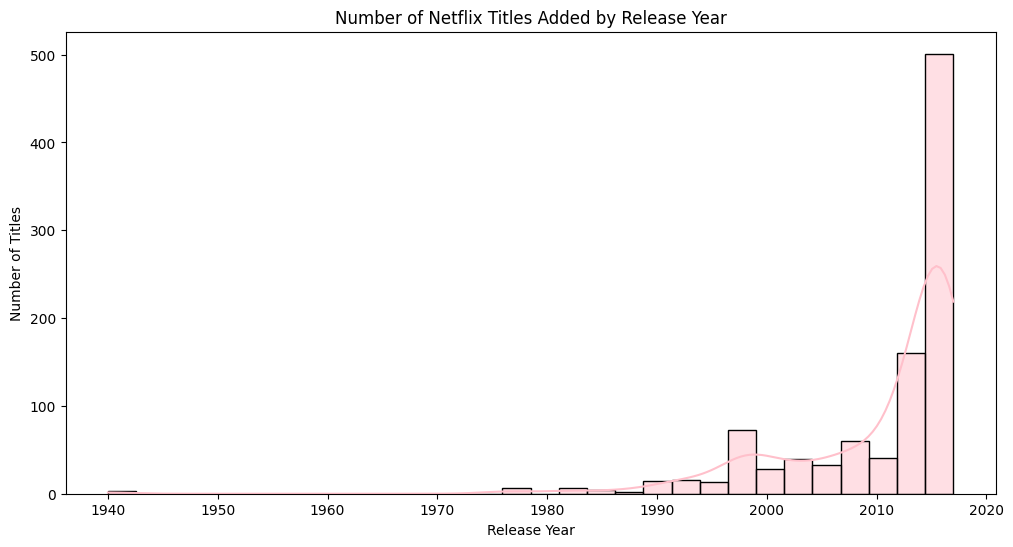

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values if any
release_years = df['release_year'].dropna()

# Plot histogram of release years
plt.figure(figsize=(12, 6))
sns.histplot(release_years, bins=30, kde=True, color='pink')

# Add titles and labels
plt.title('Number of Netflix Titles Added by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

In [ ]:
#Top 10 user rating

rating_counts = df['user_rating_score'].value_counts().head(10)
print(rating_counts)

user_rating_score
98.0    46
97.0    36
91.0    33
95.0    33
94.0    32
96.0    31
92.0    28
81.0    27
93.0    24
80.0    21
Name: count, dtype: int64


Visualize data using bar plots, count plots, and timelines.

Index(['release_year', 'count'], dtype='object')


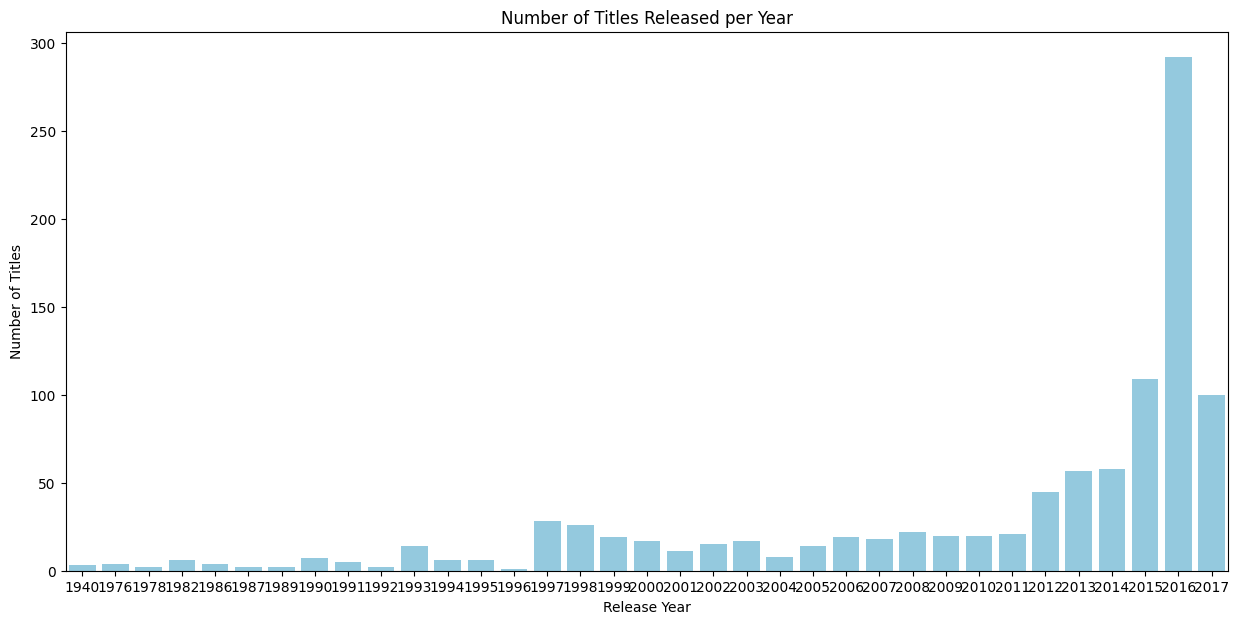

In [23]:
# Count titles per release year


import seaborn as sns
import matplotlib.pyplot as plt

# Count titles per release year and sort by year
yearly_counts = df['release_year'].value_counts().sort_index()
#print(yearly_counts)

# Converting this to a DataFrame
yearly_df = yearly_counts.reset_index()
yearly_df.columns = ['release_year', 'count']
#print(yearly_df.columns)

# Plot using seaborn barplot
plt.figure(figsize=(15, 7))
sns.barplot(data=yearly_df, x='release_year', y='count', color='skyblue')

# Add titles and labels
plt.title('Number of Titles Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

/tmp/ipython-input-20-857294051.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='title', palette='Set2')


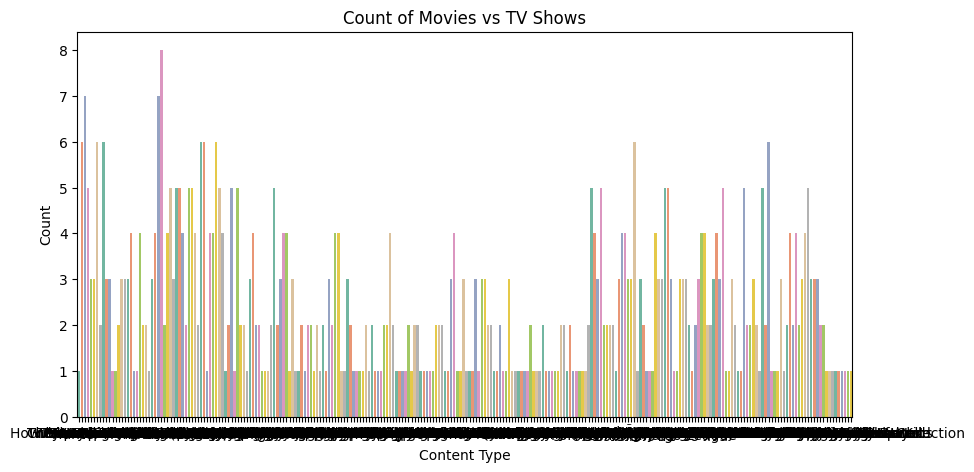

In [ ]:
#Show distribution of content type (movie vs TV show)
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='title', palette='Set2')
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()
